In [165]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [166]:
data_dir = os.listdir()[10]

In [167]:
data_dir

'주요 교역국 대세계 품목별 수출입액(USD단위)'

In [168]:
colums_list = ['HS','Imported value in 2012','Imported value in 2013','Imported value in 2014','Imported value in 2015','Imported value in 2016','Imported value in 2017','Imported value in 2018','Imported value in 2019','Imported value in 2020','Imported value in 2021']
summury = pd.DataFrame(columns = colums_list)

In [169]:
summury.set_index('HS', inplace=True)

### 1. 수입 비중 시각화

In [170]:
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    count = 0
    if current_path.split('_')[6]=='imported':
        if count == 0:
            print(current_path)
            temp = pd.read_csv(current_path, encoding='unicode_escape')
            new_df = temp.drop(0, axis=0)
            new_df["HS"]=new_df["Code"].str[0:1].astype('int')
            temp_HS = new_df.groupby('HS').sum()
            summury=temp_HS
            count+=1
        else:
            print(current_path)
            temp = pd.read_csv(current_path, encoding='unicode_escape')
            new_df = temp.drop(0, axis=0)
            new_df["HS"]=new_df["Code"].str[0:1].astype('int')
            temp_HS = new_df.groupby('HS').sum()
            summury=summury.add(temp_HS, fill_value = 0, axis = 0)

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Vi

In [171]:
summury

,Imported value in 2012,Imported value in 2013,Imported value in 2014,Imported value in 2015,Imported value in 2016,Imported value in 2017,Imported value in 2018,Imported value in 2019,Imported value in 2020,Imported value in 2021
HS,,,,,,,,,,
1,4118259,4241415,5128722,5566990,6011771,5870573,6891477,7116099,8377894,9844504.0
2,18344172,18152907,19139768,16713038,16947969,21219065,27537821,28586272,26865153,29340452.0
3,15069863,17109391,18847447,19710771,21230986,25438886,28003179,29168020,29517755,35107683.0
4,6405718,7129801,8678296,8729616,8550915,10293931,10468642,10719849,10282690,12789826.0
5,8516724,9876340,11135263,11560655,11754592,13150456,15251071,15187532,13073247,16734204.0
6,3417429,4273510,4956933,5481052,6093325,6877324,7664768,8402010,8249137,17335264.0
7,14151316,15707471,17996668,19072060,19625475,22891372,26714763,25813609,24375777,30796905.0
8,40205016,51145171,56841315,72833722,77916443,96741206,99459228,113153991,127201433,156513509.0
9,3551911,4396559,5114659,6107979,6846888,10732491,14877874,15294640,13366395,20736433.0


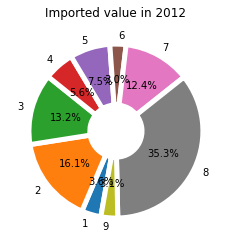

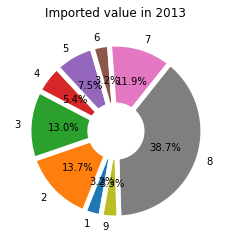

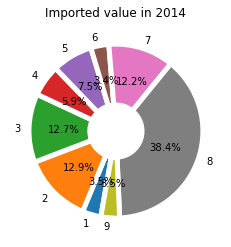

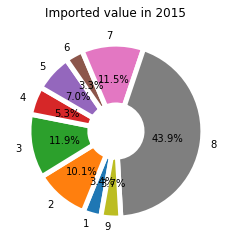

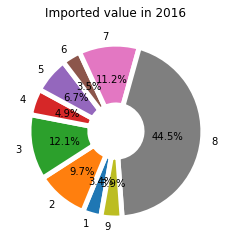

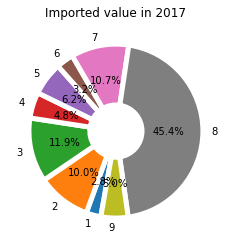

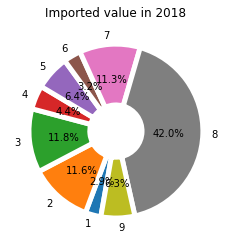

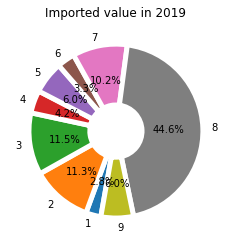

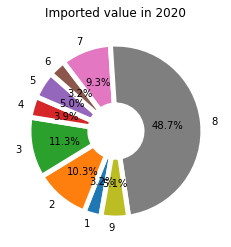

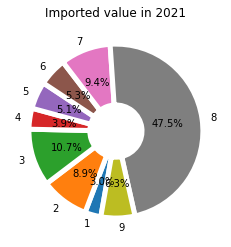

In [176]:
for i in range(10):
    a=2012
    a=(a+i)
    ratio = summury['Imported value in '+str(a)]
    labels = summury.index
    #plt.pie(ratio, labels=labels, autopct='%.1f%%')
    plt.title('Imported value in '+str(a))
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

In [179]:
summury.sum(axis=0)

Imported value in 2012    113780408.0
Imported value in 2013    132032565.0
Imported value in 2014    147839071.0
Imported value in 2015    165775883.0
Imported value in 2016    174978364.0
Imported value in 2017    213215304.0
Imported value in 2018    236868823.0
Imported value in 2019    253442022.0
Imported value in 2020    261309481.0
Imported value in 2021    329198780.0
dtype: float64

<AxesSubplot:>

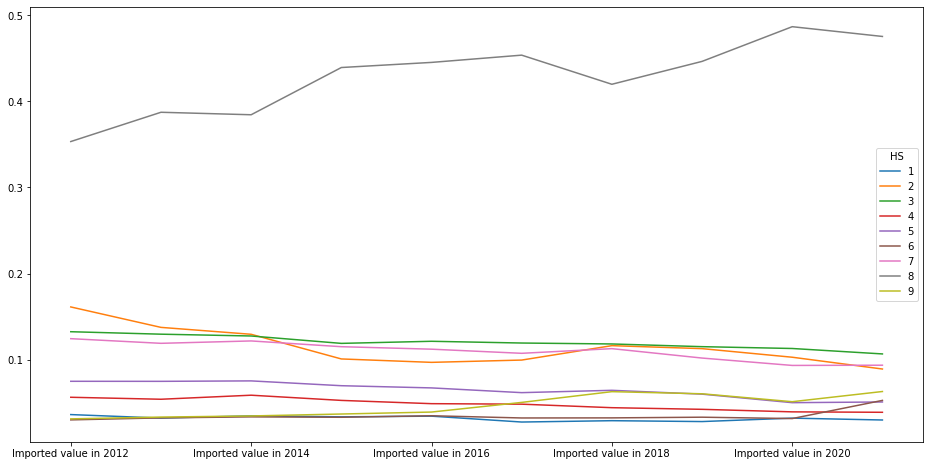

In [190]:
summury.div(summury.sum(axis=0), axis=1).T.plot(figsize=(16, 8))

### 2. 수출 비중 시각화

In [191]:
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    count = 0
    if current_path.split('_')[6]=='exported':
        if count == 0:
            print(current_path)
            temp = pd.read_csv(current_path, encoding='unicode_escape')
            new_df = temp.drop(0, axis=0)
            new_df["HS"]=new_df["Code"].str[0:1].astype('int')
            temp_HS = new_df.groupby('HS').sum()
            summury=temp_HS
            count+=1
        else:
            print(current_path)
            temp = pd.read_csv(current_path, encoding='unicode_escape')
            new_df = temp.drop(0, axis=0)
            new_df["HS"]=new_df["Code"].str[0:1].astype('int')
            temp_HS = new_df.groupby('HS').sum()
            summury=summury.add(temp_HS, fill_value = 0, axis = 0)

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Vi

<AxesSubplot:>

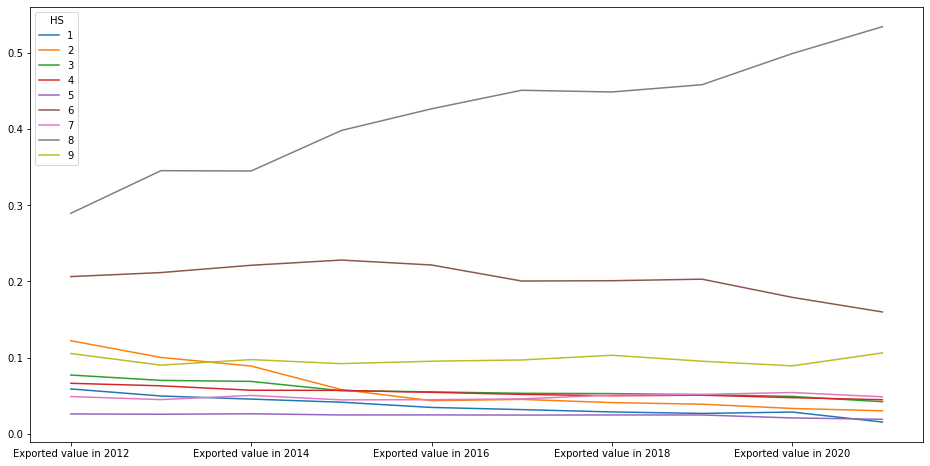

In [192]:
summury.div(summury.sum(axis=0), axis=1).T.plot(figsize=(16, 8))